In [62]:
import pandas as pd

In [63]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

In [66]:
%matplotlib inline

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
pd.set_option('display.max_rows', None)

In [69]:
df = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/13.01.21/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [70]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [71]:
#Show DataFrame info.

In [72]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [73]:
#Describe DataFrame

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [75]:
#Show a plot of the total number of responses.

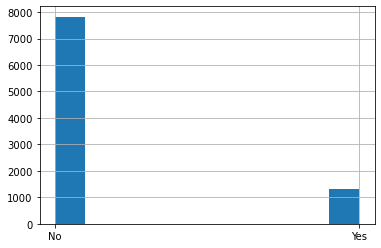

In [76]:
df['Response'].hist()
plt.show()

In [77]:
dftrimmed = df.loc[:,['Response','Sales Channel', 'Total Claim Amount', 'Income']]
dftrimmed.head()

,Response,Sales Channel,Total Claim Amount,Income
0,No,Agent,384.811147,56274
1,No,Agent,1131.464935,0
2,No,Agent,566.472247,48767
3,No,Call Center,529.881344,0
4,No,Agent,138.130879,43836


In [78]:
#Show a plot of the response rate by the sales channel.

In [79]:
responsexchannel = dftrimmed.groupby(['Sales Channel']).count().sort_values(['Response'], ascending=True).reset_index()
responsexchannel

,Sales Channel,Response,Total Claim Amount,Income
0,Web,1325,1325,1325
1,Call Center,1765,1765,1765
2,Branch,2567,2567,2567
3,Agent,3477,3477,3477


<function matplotlib.pyplot.show(close=None, block=None)>

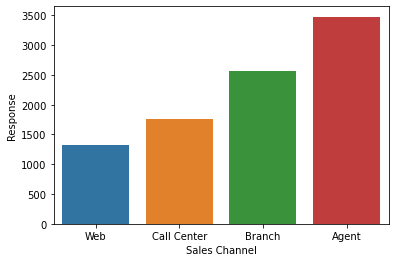

In [80]:
sns.barplot(x='Sales Channel', y='Response', data=responsexchannel)
plt.show

In [81]:
#Show a plot of the response rate by the total claim amount.

In [92]:
responsexclaim = dftrimmed.groupby(['Total Claim Amount']).count().sort_values(['Response'], ascending=False).reset_index()
responsexclaim.head()

,Total Claim Amount,Response,Sales Channel,Income
0,316.8,116,116,116
1,292.8,110,110,110
2,312.0,108,108,108
3,350.4,105,105,105
4,331.2,102,102,102


<function matplotlib.pyplot.show(close=None, block=None)>

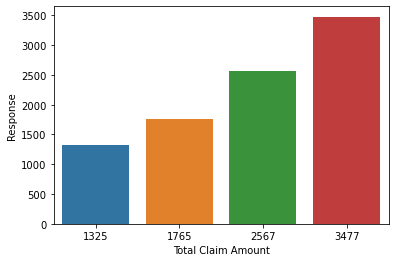

In [93]:
sns.barplot(x='Total Claim Amount', y= 'Response', data=responsexchannel)
plt.show

In [94]:
#Show a plot of the response rate by income.

In [95]:
responsexincome = dftrimmed.groupby(['Income']).count().sort_values(['Response'], ascending = False).reset_index()
responsexincome.head()

,Income,Response,Sales Channel,Total Claim Amount
0,0,2317,2317,2317
1,95697,12,12,12
2,61108,7,7,7
3,40864,7,7,7
4,25370,7,7,7


<function matplotlib.pyplot.show(close=None, block=None)>

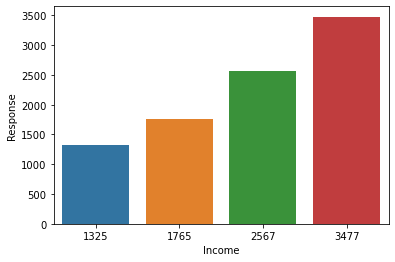

In [96]:
sns.barplot(x='Income', y='Response', data=responsexchannel)
plt.show